# Bank Fraud Detection Project 
### -- Data Anonymization Issue & Inbalanced Data Issue

## Warm Up

#### Classify the two cluster data and find the boundary line to devide the two groups. 

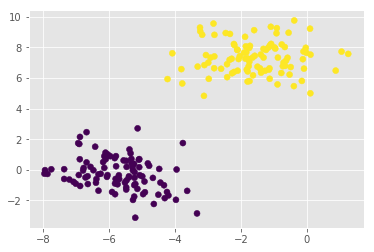

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('ggplot')
%matplotlib inline
X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=22)
plt.scatter(X[:,0],X[:,1], c=Y)

In [2]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1.0).fit(X,Y)
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=1.0).fit(X,Y)
poly_svc = svm.SVC(kernel='poly', degree=3,C=1.0).fit(X,Y)
lin_svc = svm.LinearSVC(C=1.0).fit(X,Y)

print(svc)
print(rbf_svc)
print(poly_svc)
print(lin_svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/Users/freena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [3]:
h = 0.02 # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, y_max, h),
                     np.arange(y_min, y_max, h))


In [4]:
# concatenate numpy array
np.concatenate((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1)), axis=1)

array([[-8.46179414, -3.63591172],
       [-8.44179414, -3.63591172],
       [-8.42179414, -3.63591172],
       ...,
       [10.21820586, 10.26408828],
       [10.23820586, 10.26408828],
       [10.25820586, 10.26408828]])

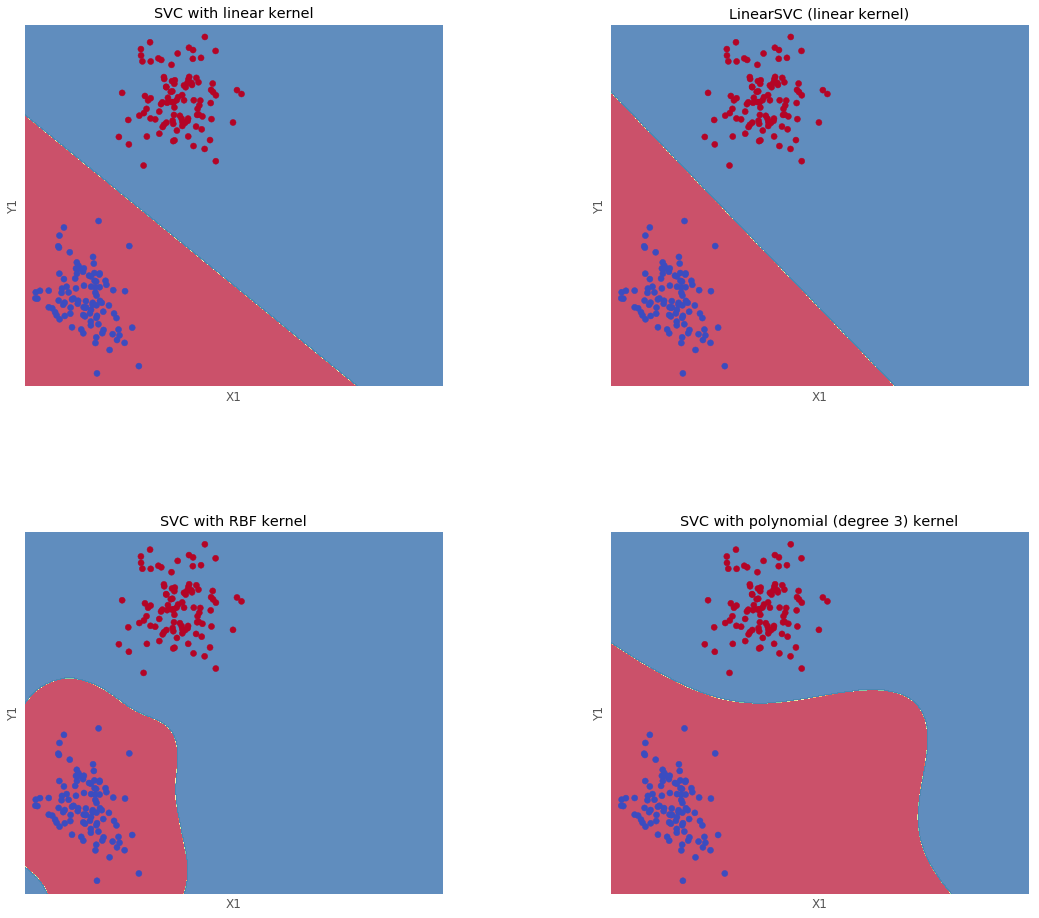

In [5]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']
fig = plt.figure(figsize=(18,16))
for i, clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    # plot the decision boundary
    # assign a color to each
    # point in the mesh [x_min,x_max]*[y_min,y_max]
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.concatenate((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1)), axis=1))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral, alpha=0.8)
    # cmap=plt.cm.coolwarm check code:
    # http://matplotlib.org/examples/color/colormaps_reference.html
    
    # plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('Y1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


## Bank Fraud Detection Case
#### In warm up, we use classification method to classify two two-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following I will solve a Bank Fraud Detection Case where classify two multiple-feature groups.

**Data Description:**

**label.test.csv** - the test set, contains customer’s basic attributes and payment histories. You must predict whether these customers are credible or not.

**sample submission.csv** - a file showing the correct submission format. You must replace the NA’s with the predicted class labels. You should show your results by submitting the .csv file according to the format of this sample submission.csv.

**id**: A unique Id field which represents a customer

**X1**: Credit lineX2: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is creditable (1) or not (0).

This is a real problem to classify multi-feature data into two groups.


### Data Anonymization

- Data anonymization is the use of one or more techniques designed to make it impossible – or at least more difficult – to identify a particular individual from stored data related to them.
- Anonymization is a data processing technique that removes or modifies personally identifiable information; it results in anonymized data that cannot be associated with any one individual.
- Two of the techniques we use to protect your data: 1. Generalizing the data 2. Adding noise to data
- What Data usually be Anonymized? Name, phonenumber,SSn, IP address, lisence ...


In this dataset, all the columns name changed into X1-X18 and all the catogorical data is labeld as numbers


**Steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
( You can google “Component Analysis with KMeans visuals – Kaggle” and learn how to do this step from Kaggle website)
4.	You don’t need to do PCA right now. 
5.	Choose the proper method to train the model:
binary classification Models: Logistic regression, Support vector machine, Naive Bayes, k-nearest neighbors, neural network, Decision tree…

6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.


### Step 1: load the datasets and overview

In [6]:

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.shape)
print(test_data.shape)

(25000, 25)
(5000, 24)


In [7]:
train_data.columns

Index(['id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
train_data.iloc[0:10,6:12]

,X6,X7,X8,X9,X10,X11
0,0,0,0,0,0,0
1,0,0,0,2,0,0
2,0,0,0,0,0,0
3,1,-2,-2,-1,0,0
4,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,2
6,0,-1,-1,-1,0,-1
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,-2,-2,-2,-2,-2,-2


In [9]:
train_data.dtypes

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [10]:
train_data.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

### Step 2: Distingush categorical and continuous variables
- Checked the reference notes is good
- OR define the function to do it

In [11]:
# set the threshold as 15 for differentiate the categorical and continuous variables
cat_v = []
con_v = []
for c in train_data.columns:
    if len(train_data[c].value_counts().index) <=15:
        cat_v.append(c)
    else:
        con_v.append(c)
cat_v.remove('Y')
target = ['Y']

In [12]:
print('The continuous variables: ', con_v, '\n')
print('The categorical variables: ', cat_v)

The continuous variables:  ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'] 

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


### Step 3: Basic feature analysis

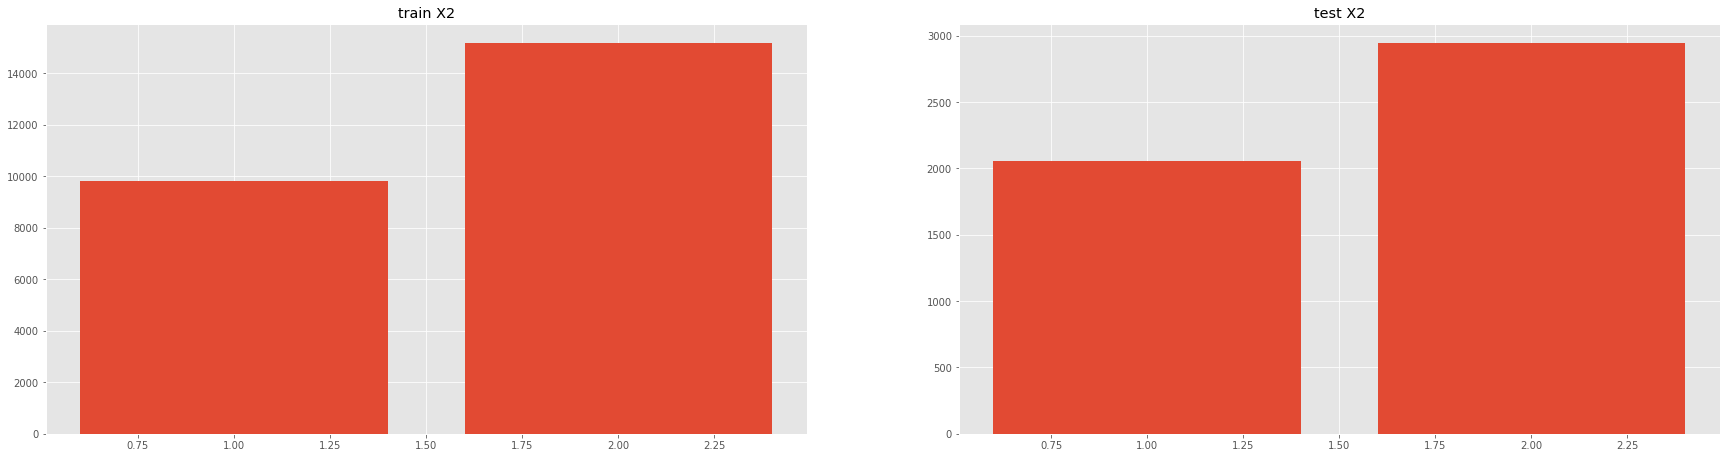

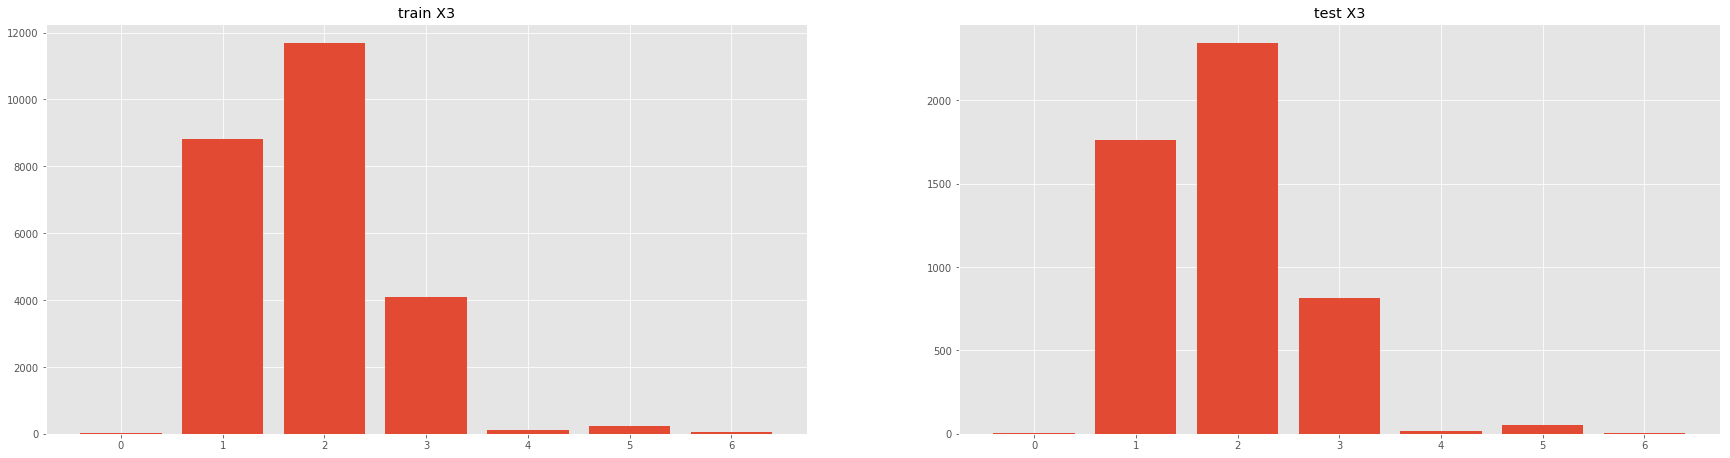

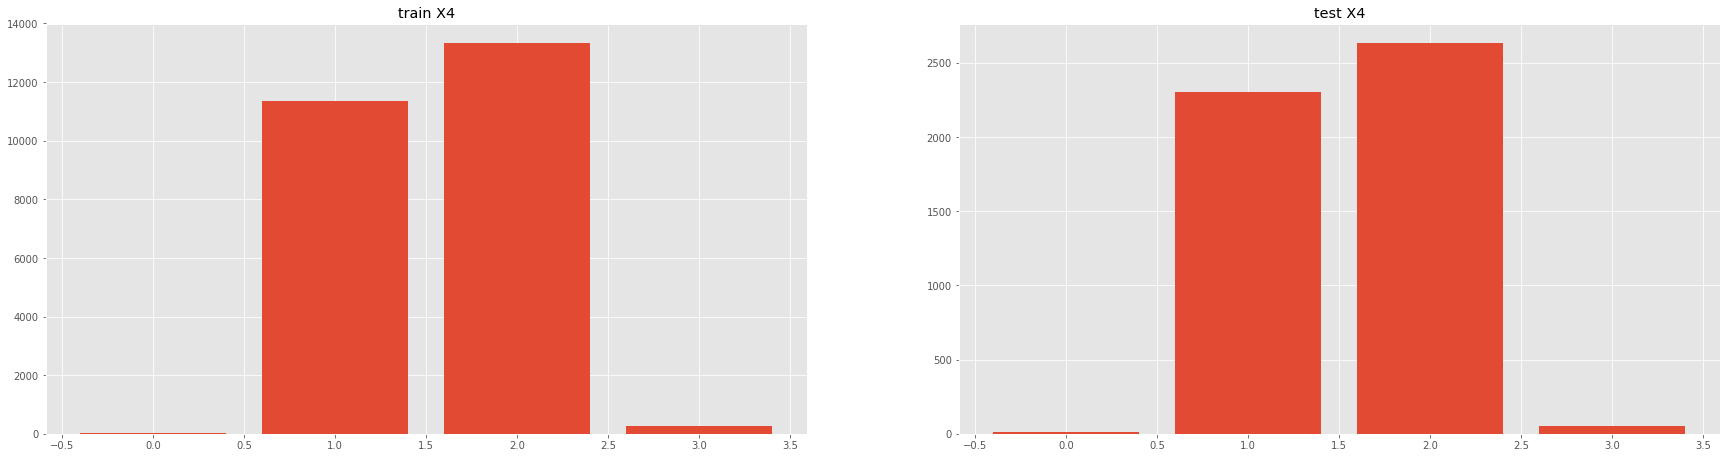

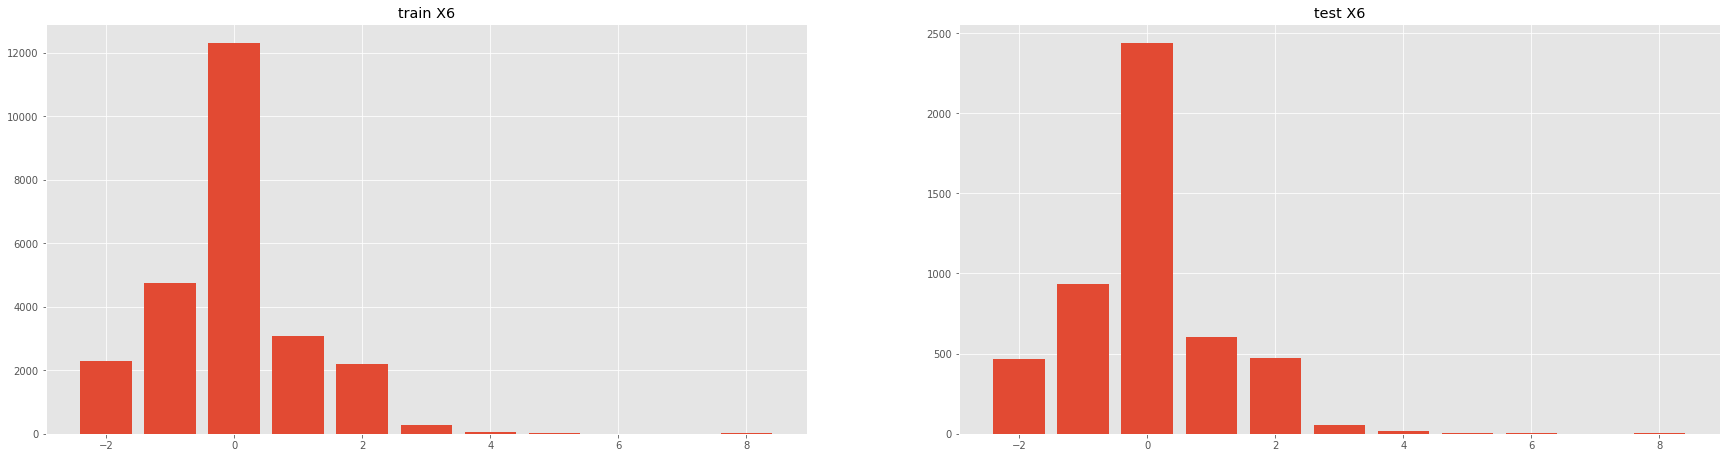

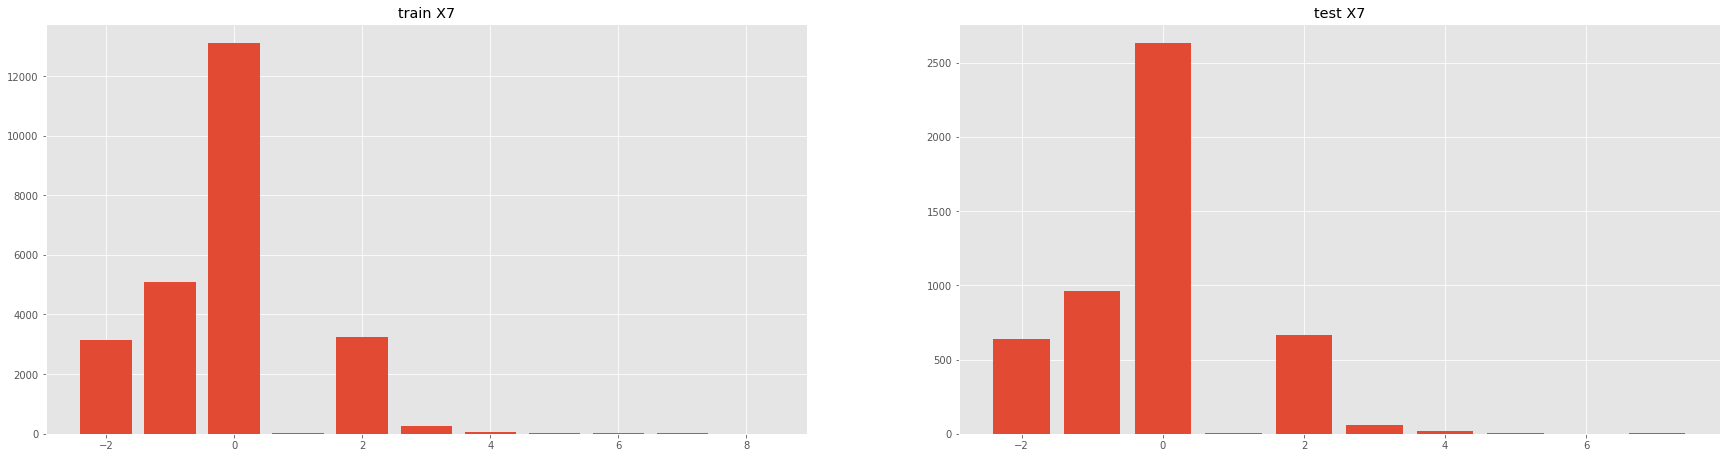

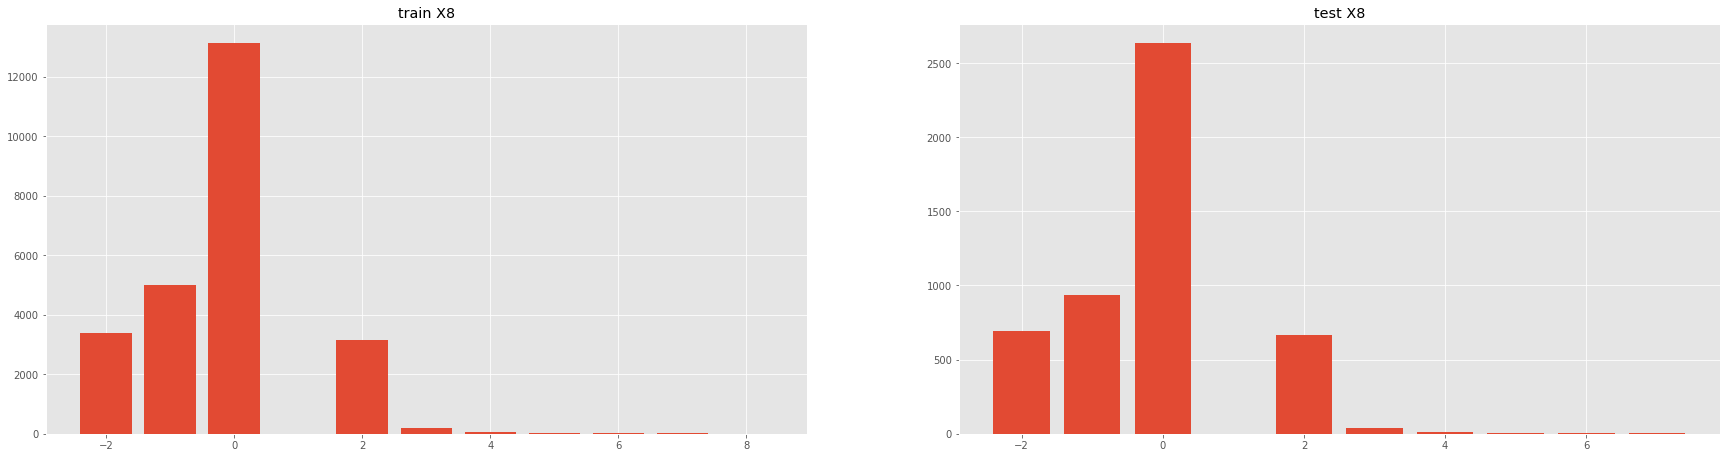

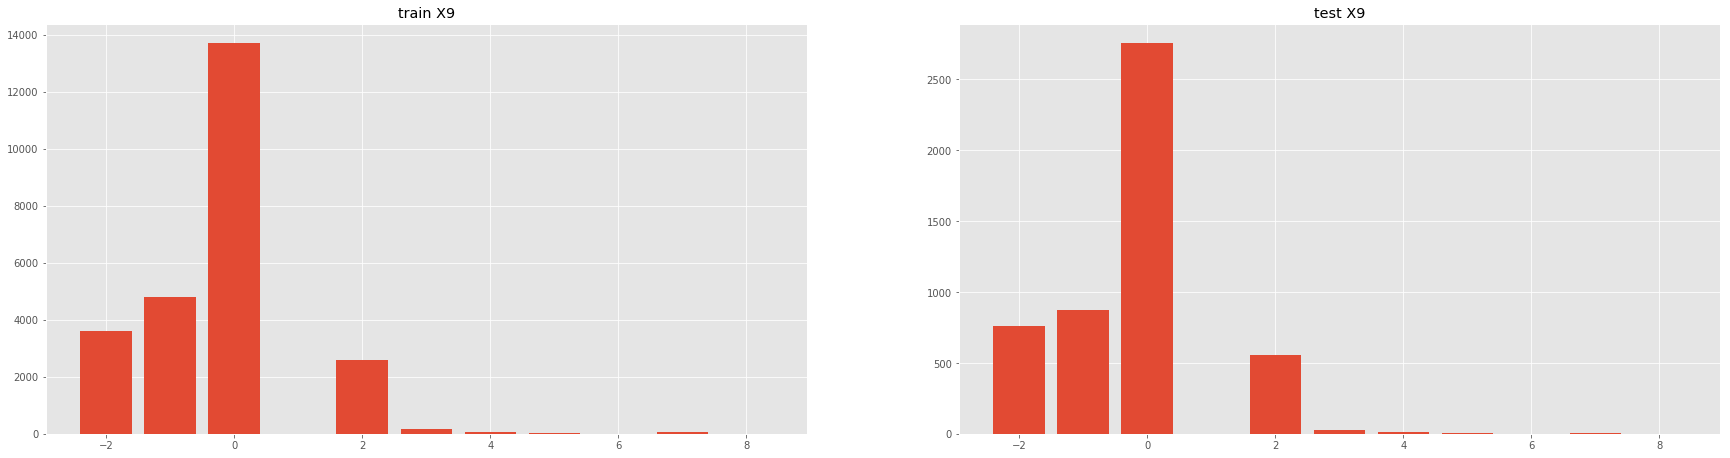

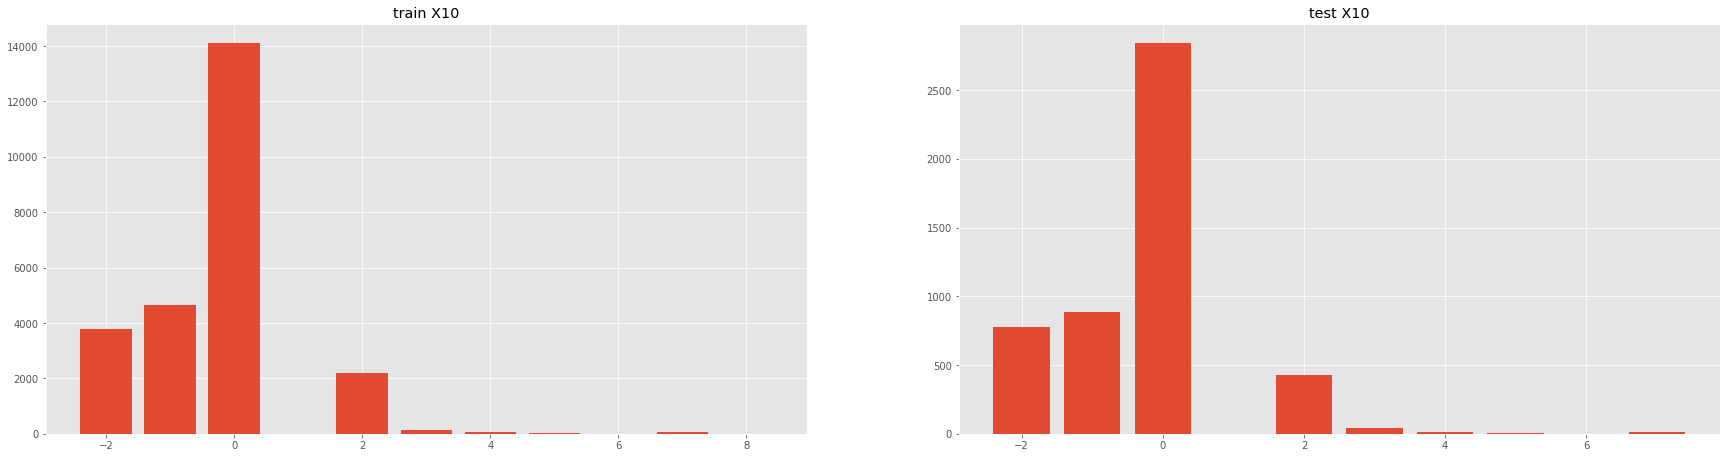

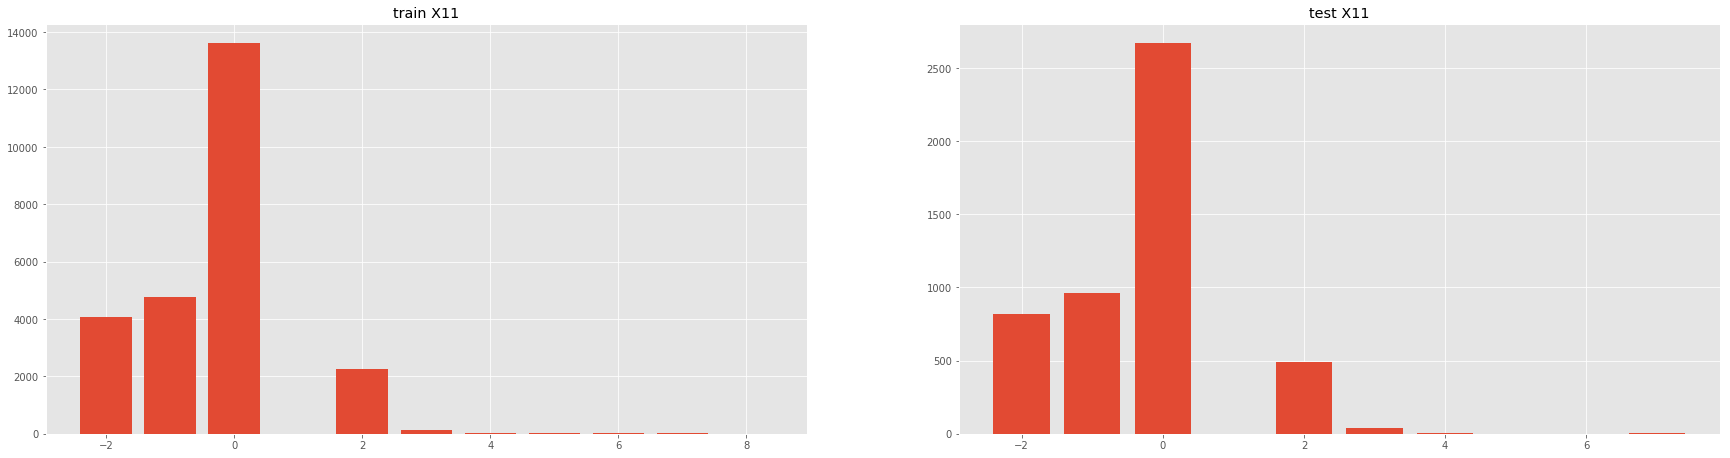

In [13]:
# check the categorical features' distributions train v.s test
count = 1
for i in range(len(cat_v)):
    fig = plt.figure(figsize=(30,80))
    plt.subplot(len(cat_v),2,count)
    plt.bar(train_data[cat_v[i]].value_counts().index, train_data[cat_v[i]].value_counts().values)
    plt.title('train ' + cat_v[i])
    
    plt.subplot(len(cat_v),2,count+1)
    plt.bar(test_data[cat_v[i]].value_counts().index, test_data[cat_v[i]].value_counts().values)
    plt.title('test ' + cat_v[i])
    count += 2

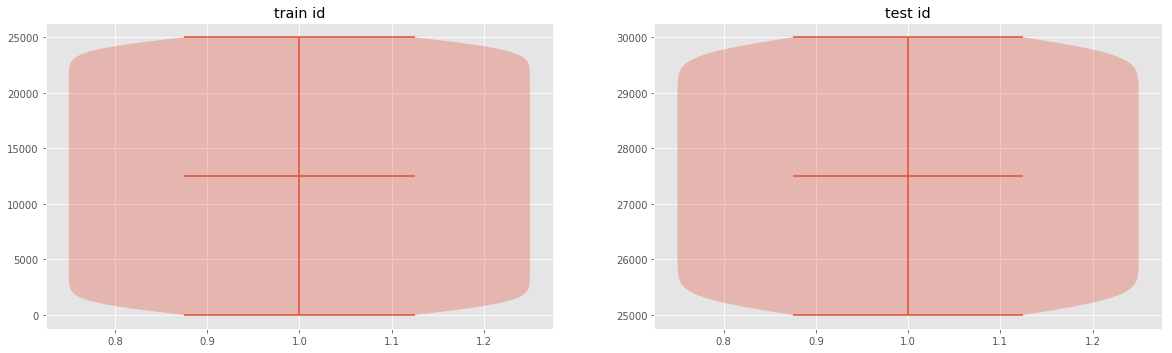

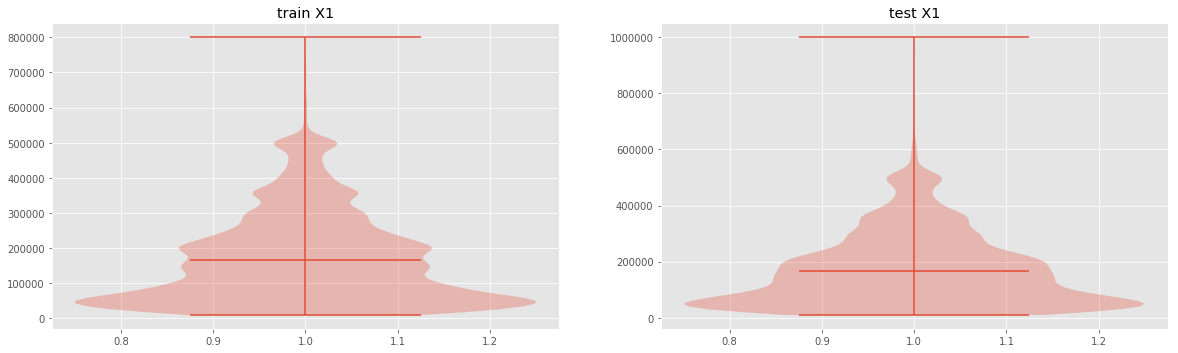

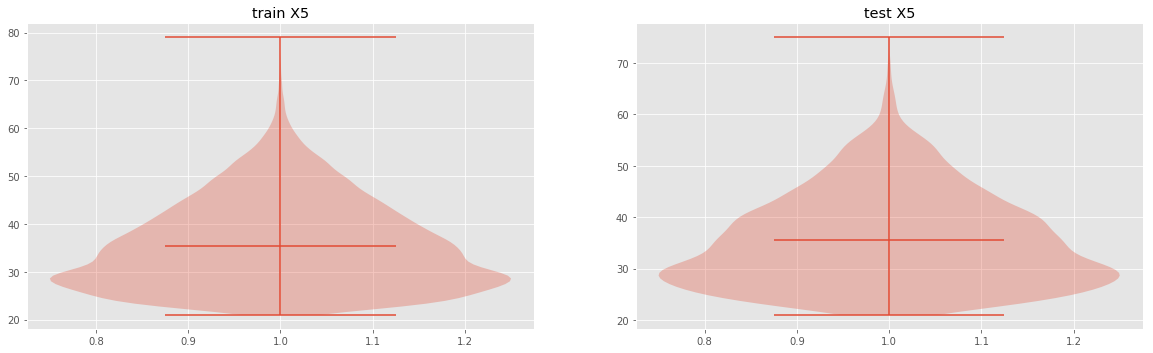

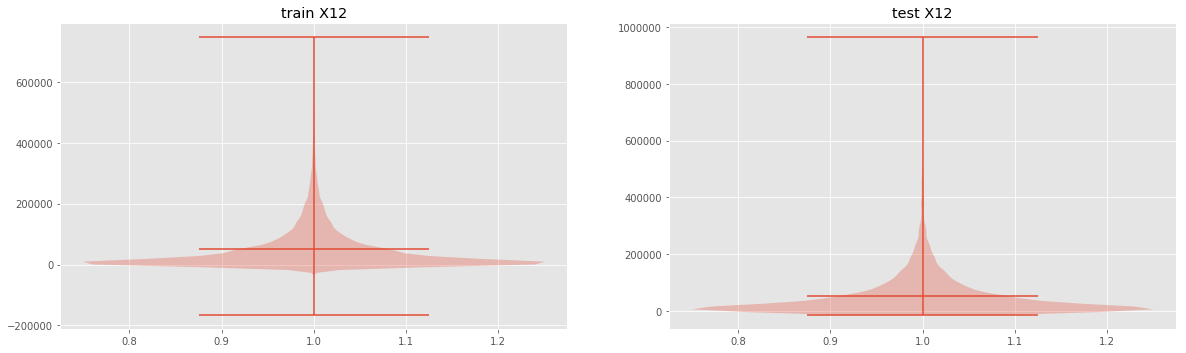

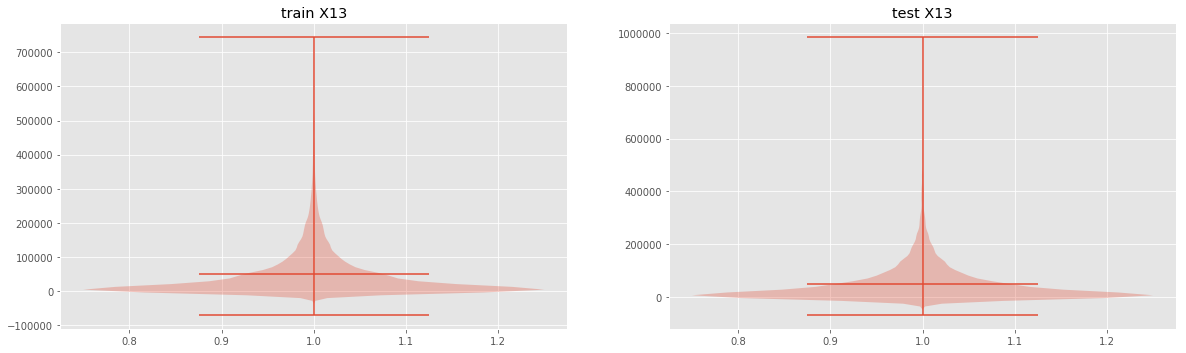

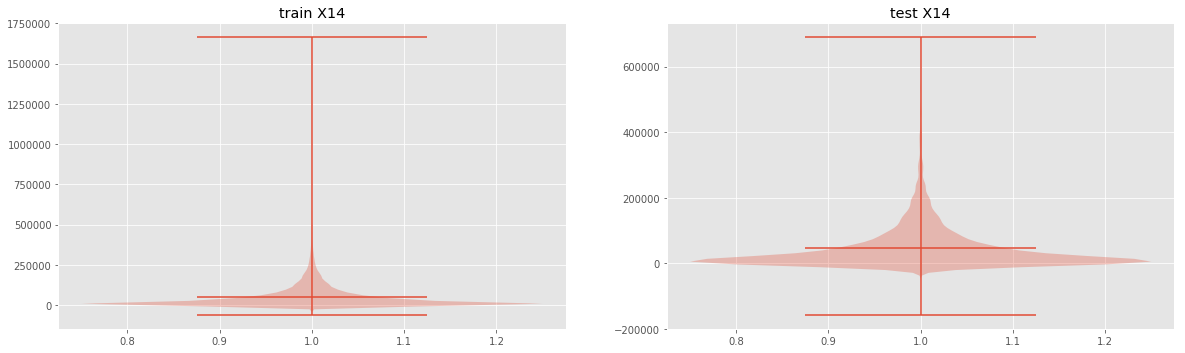

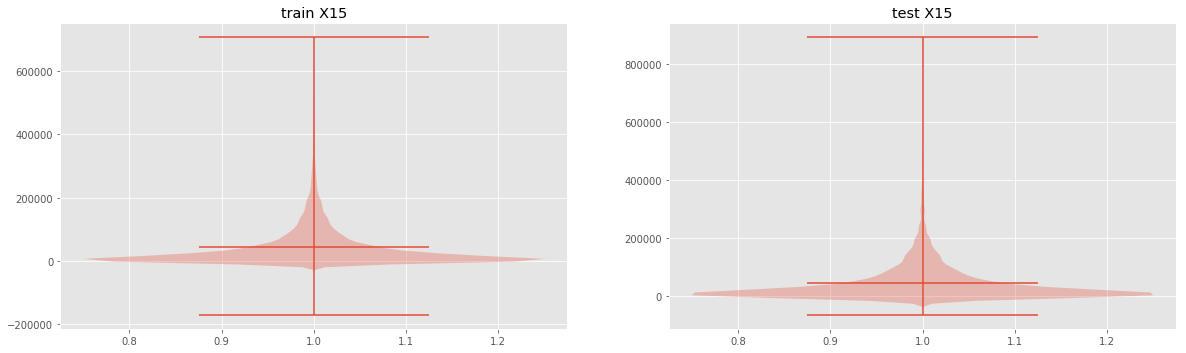

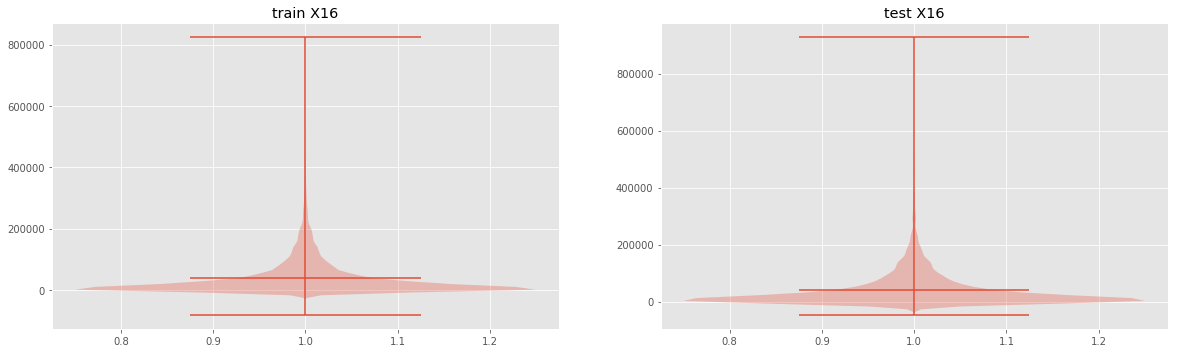

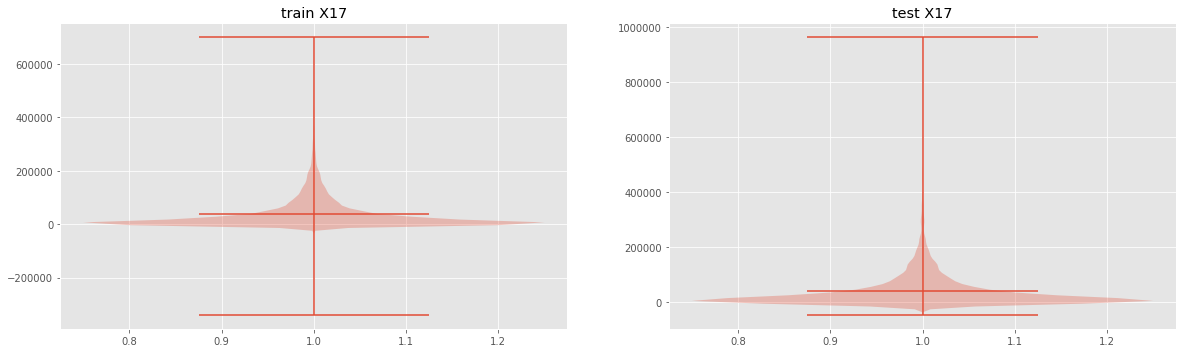

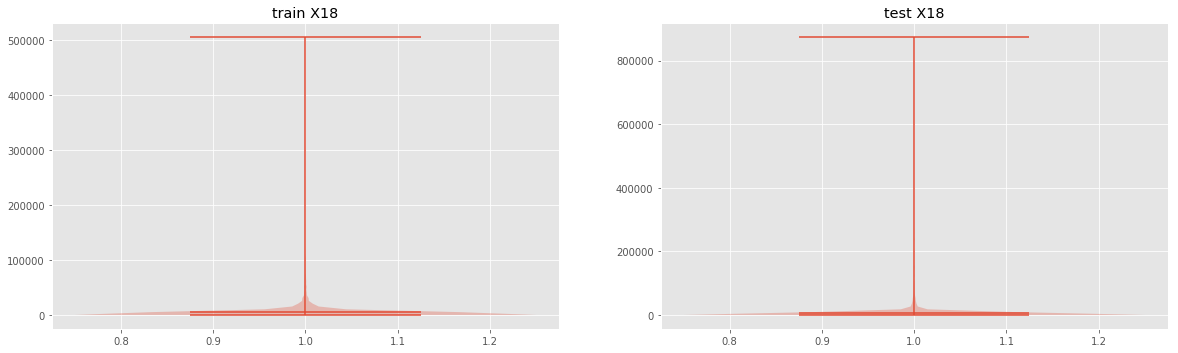

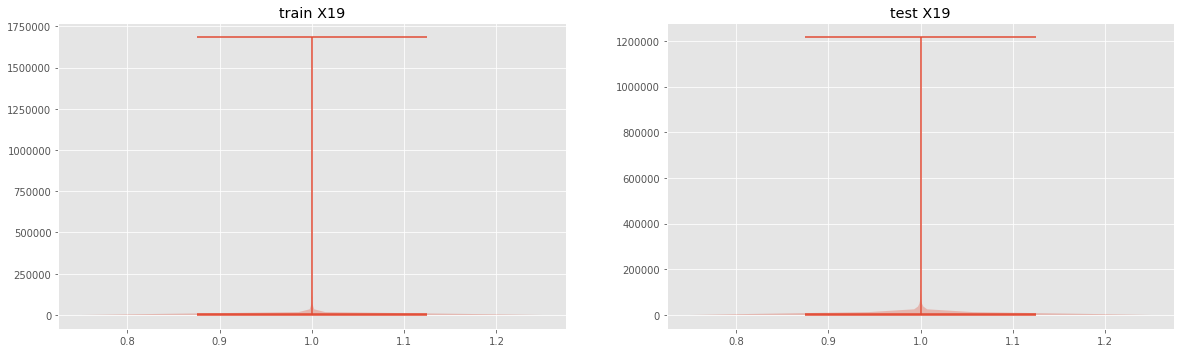

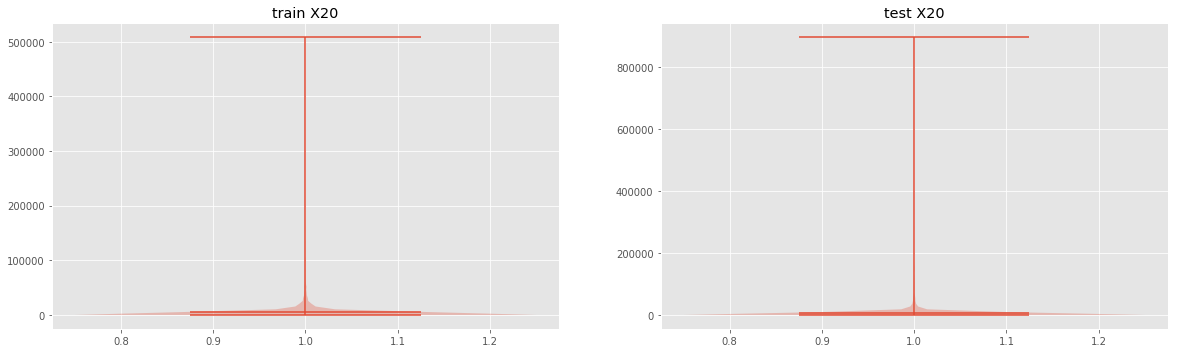

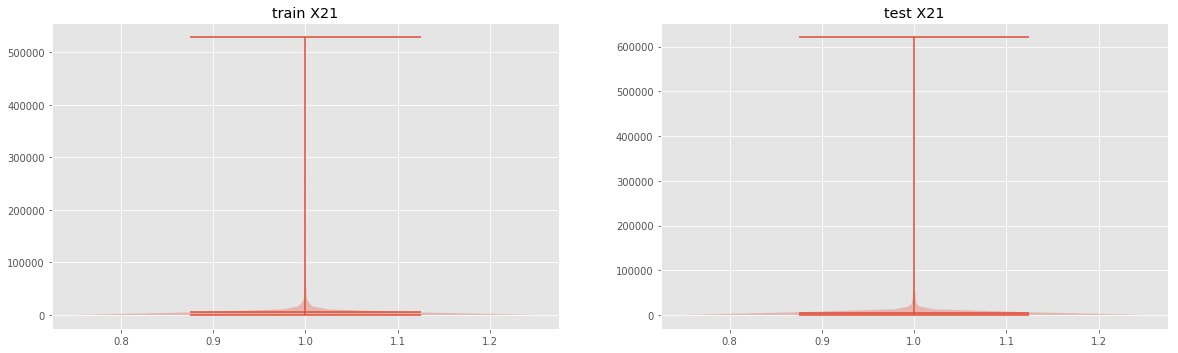

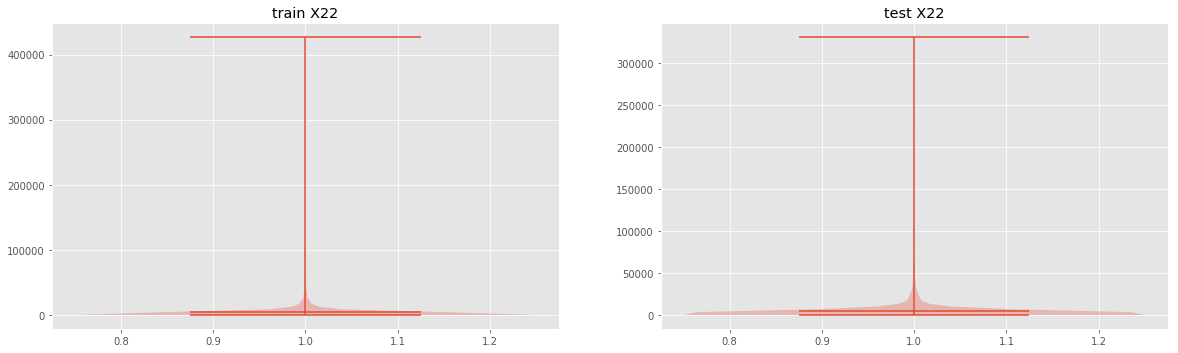

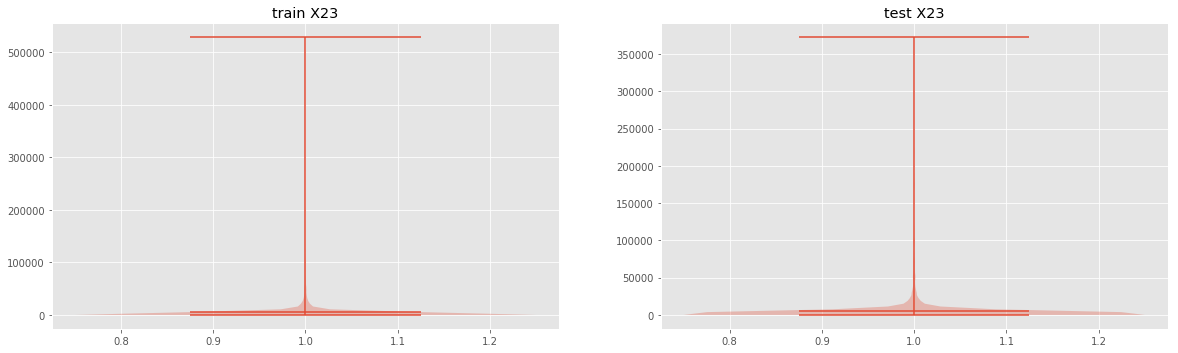

In [14]:
## check the continuous features' distributions train v.s test
count = 1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(con_v),2,count)
    plt.violinplot(train_data[con_v[i]], showmeans=True)
    plt.title('train ' + con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.violinplot(test_data[con_v[i]], showmeans=True)
    plt.title('test ' + con_v[i])
    count += 2

#### How to deal with categorical data:
http://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

#### How to deal with continous data:
http://www.analyticsvidhya.com/blog/2015/11/8-ways-deal-continuous-variables-predictive-modeling/

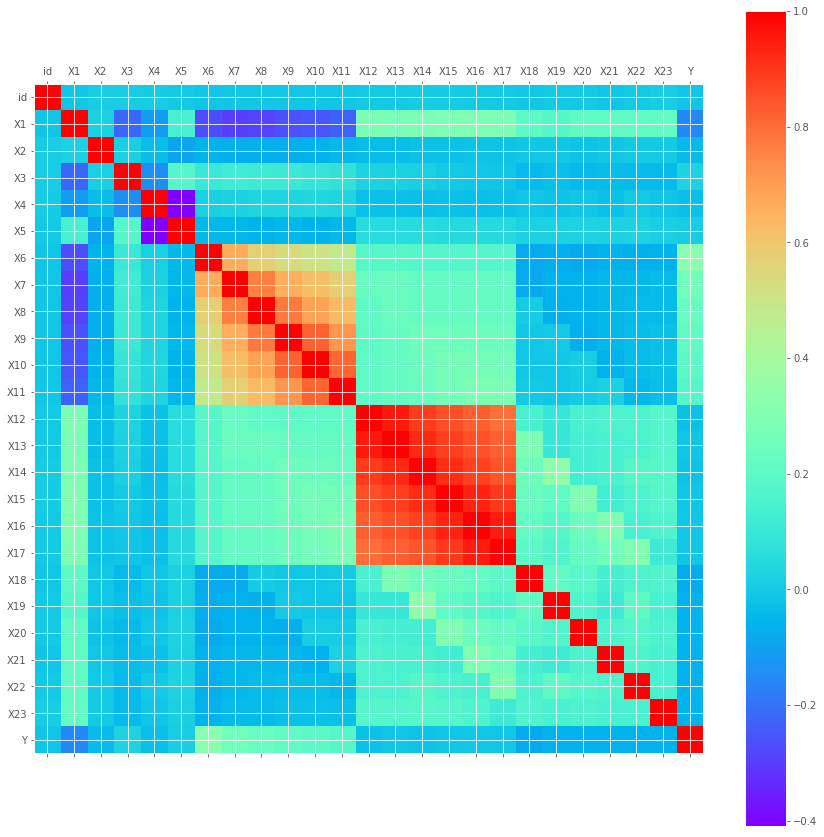

In [15]:
# check if there are linear relationships between features
def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    cax = ax.matshow(corr, cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
    
plot_corr(train_data)

([<matplotlib.axis.XTick at 0x1a19497860>,
 <a list of 2 Text xticklabel objects>)

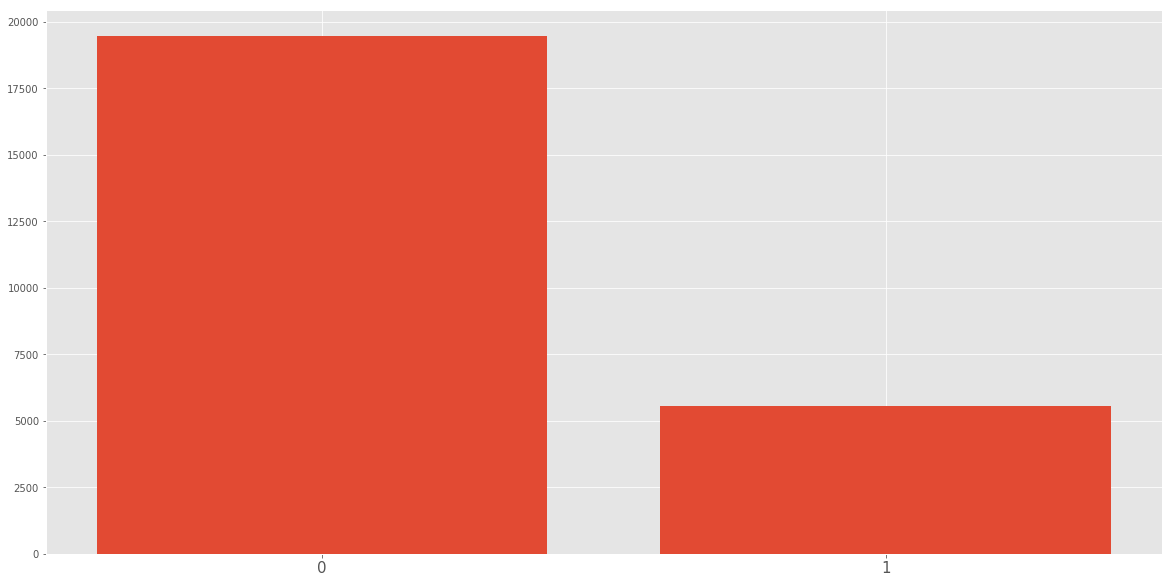

In [16]:
# check the pattern of label
fig = plt.figure(figsize=(20,10))
plt.bar(train_data['Y'].value_counts().index, train_data['Y'].value_counts().values)
plt.xticks(train_data['Y'].value_counts().index, fontsize=15)

### Inbalanced Data Issue
#### Observation: The label is imbalanced, which label 1 is roughly 1/3 of label 0. It will harm our model if don't deal it well.

#### Methods to deal with imbalanced data
1. Choose a good metrics: Confusion Matrix -- recision/recall/F1 score
2. Resampling your dataset: 
    - You can add copies of instances from the under-represented class called over-sampling
    - Use systematic algorithms to generatr new instances: synthetic minority over-sampling
    - You can delete instances from the over-represented class, called under-sampling. (when the dataset is big enough)
    - Imbalanced-learn package: https://github.com/scikit-learn-contrib/imbalanced-learn
3. Penalized Models: Such as tune the para in RandomForestClassifier class_weight = {0:1, 1:3}; Logisticregression: penalty, penalized-SVM ...
4. tactics to combat imbalanced classed in your machine learning dataset:
http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

### Step 4: Build the models

Here I always choose random forest three models as my first baseline model:
1. By principle since it randomizes the variable selection during each tree split it's not prone to overfit unlike other models
2. You don't need to preprocessing data too much
3. I used to read that RF don't need CV because it has includes bootstrap sampling and random variable selection in the process of model fit. But still it is strongly recommended to do CV if you can. 

In [17]:
# split the data
from sklearn.model_selection import train_test_split
Y = train_data['Y']
X = train_data.drop(['Y','id'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=22)

In [18]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3}) # change the weight of label 0:1, lable 1: 3 to fix imbalanced issue
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

/Users/freena/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3900
           1       0.63      0.30      0.41      1100

   micro avg       0.81      0.81      0.81      5000
   macro avg       0.73      0.63      0.65      5000
weighted avg       0.79      0.81      0.78      5000



#### Predicted lable 1 recall = 0.30 is unacceptable low, which means high false nagative rate

If use Linear regression, Logistic Regression, SVM..., it needs the on-hot-encoing to categorical features. 
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- https://achyutjoshi.github.io/datascience/one-hot-encoding


### Step 5: Basic parameter tuning: Grid Searching

- GridSearchCV: Exhaustive search over specified parameter values for an estimator.
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs,cv):
    model = GridSearchCV(estimator = est,
                         param_grid = param_grid,
                         scoring = 'f1_weighted',
                         verbose = 10,
                         n_jobs = n_jobs,
                         iid = True,
                         cv=cv)
    # fit Grid Search Model
    model.fit(x_train, y_train)
    return model

In [20]:
## Grid search is actually using cross validation method to tune parameters
## to scan all possible parameter combinations and return the best one.

In [21]:
param_grid = {'n_estimators':[100,300,500],
              'criterion':['gini','entropy'],
              'class_weight':[{0:1,1:3}]}
RF = search_model(X.values
                  ,Y.values
                  ,RandomForestClassifier()
                  ,param_grid
                  , -1
                  , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  2.9min remaining:   19.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished


In [22]:
print('Best score; %0.3f' % RF.best_score_)
print('Best parameters set:', RF.best_params_)
print('Scores:', RF.cv_results_)

Best score; 0.794
Best parameters set: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}
Scores: {'mean_fit_time': array([ 6.18718958, 19.60498495, 34.25950236, 10.05875835, 26.75788751,
       39.00418825]), 'std_fit_time': array([0.19721741, 0.16544217, 1.66548891, 1.05492796, 0.38608951,
       6.06288379]), 'mean_score_time': array([0.13367801, 0.39006915, 0.70187364, 0.15131946, 0.39052348,
       0.5359725 ]), 'std_score_time': array([0.0023985 , 0.01902145, 0.05459807, 0.02590854, 0.02043044,
       0.09946362]), 'param_class_weight': masked_array(data=[{0: 1, 1: 3}, {0: 1, 1: 3}, {0: 1, 1: 3}, {0: 1, 1: 3},
                   {0: 1, 1: 3}, {0: 1, 1: 3}],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                   'entropy'],
             mask=[False, False, False, False, False, False],
       fill_va

### Step 6: Model Ensemble

In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators=500, criterion='entropy',class_weight={0:1,1:3})
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression(class_weight={0:1,1:3},solver='liblinear')

# result from gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest',clf1),('KNN',clf2),('Logistic', clf3)],
                        voting='hard')
for clf,label in zip([clf1,clf2,clf3,eclf],['Random_Forest','KNN','Logistic','Ensemble']):
    scores = cross_val_score(clf,X,Y,cv=3,scoring='f1_weighted')
    print(('Accurancy: %0.2f (+/- %0.2f) [%s]') % (scores.mean(), scores.std(),label))

Accurancy: 0.79 (+/- 0.00) [Random_Forest]
Accurancy: 0.71 (+/- 0.00) [KNN]
Accurancy: 0.71 (+/- 0.05) [Logistic]
Accurancy: 0.78 (+/- 0.01) [Ensemble]


- Voting ensemble: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
- More methods: https://www.toptal.com/machine-learning/ensemble-methods-machine-learning



### Step 7: generate the final submission

In [25]:
eclf.fit(X,Y)
y = pd.DataFrame(eclf.predict(test_data.drop(['id'],axis=1)), columns=['y'])
predict_data = pd.concat([y, test_data['id']], axis=1)
predict_data.to_csv('Submission.csv',index=False)